<a href="https://colab.research.google.com/github/AzamChatrAzar/project1/blob/main/page_rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from networkx import karate_club_graph

In [2]:
import pandas as pd
edges = pd.read_csv('https://snap.stanford.edu/data/facebook_combined.txt.gz',
                   sep=' ', header=None, names=['source', 'target'])

=== اطلاعات باشگاه کاراته ===
تعداد اعضا: 34
تعداد روابط: 78

اعضای مجموعه 'سید': {0, 33, 32}

=== پیج‌رنک استاندارد ===
عضو    رتبه            تعداد دوستان
-----------------------------------
33     0.096980        17         *
0      0.088508        16         *
32     0.075926        12         *
2      0.062767        10         
1      0.057415        9          
31     0.041985        6          
23     0.041146        5          
3      0.037212        6          
5      0.033810        4          
13     0.033474        5          

=== پیج‌رنک شخصی‌سازی شده ===
عضو    رتبه            تعداد دوستان
-----------------------------------
33     0.118531        17         *
32     0.099019        12         *
0      0.098523        16         *
2      0.059637        10         
1      0.052217        9          
23     0.042349        5          
31     0.042077        6          
8      0.034652        5          
3      0.032767        6          
13     0.031641        5         

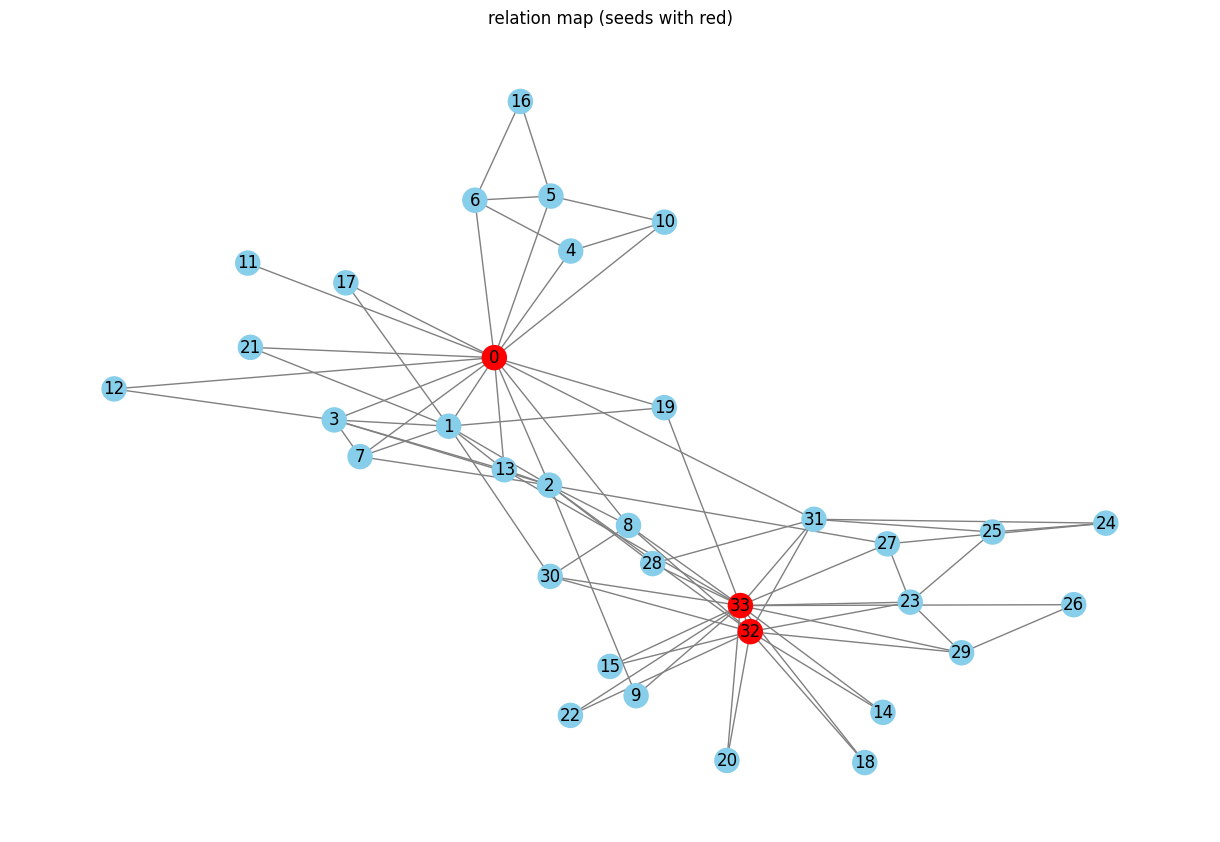

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. بارگیری دیتاست Zachary's Karate Club
G = nx.karate_club_graph()

# 2. نمایش اطلاعات گراف
print("=== اطلاعات باشگاه کاراته ===")
print(f"تعداد اعضا: {G.number_of_nodes()}")
print(f"تعداد روابط: {G.number_of_edges()}\n")

# 3. تعریف مجموعه "سید" (ترکیب روش خودکار و دستی)
# روش خودکار: 3 کاربر پرطرفدار
top_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)[:3]
auto_saeed = {node for node, _ in top_degree}

# روش دستی: کاربران مهم (مربی و مدیر)
manual_saeed = {0, 33}  # Mr. Hi و John A

# ادغام مجموعه‌ها
saeed_set = auto_saeed.union(manual_saeed)
print(f"اعضای مجموعه 'سید': {saeed_set}\n")

# 4. محاسبه پیج‌رنک استاندارد
std_pagerank = nx.pagerank(G, alpha=0.85)

# 5. محاسبه پیج‌رنک شخصی‌سازی شده
personalization = {node: 10 if node in saeed_set else 1 for node in G.nodes()}
pers_pagerank = nx.pagerank(G, alpha=0.85, personalization=personalization)

# 6. نمایش نتایج
def print_results(title, ranks, saeed_set):
    print(f"=== {title} ===")
    print("{:<6} {:<15} {:<10}".format("عضو", "رتبه", "تعداد دوستان"))
    print("-"*35)
    for node, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True)[:10]:
        saed_mark = "*" if node in saeed_set else ""
        print("{:<6} {:<15.6f} {:<10} {}".format(
            node, rank, G.degree[node], saed_mark
        ))

print_results("پیج‌رنک استاندارد", std_pagerank, saeed_set)
print()
print_results("پیج‌رنک شخصی‌سازی شده", pers_pagerank, saeed_set)

# 7. ترسیم گراف
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
node_colors = ['red' if node in saeed_set else 'skyblue' for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray')
plt.title("relation map (seeds with red)")
plt.show()

In [7]:
pip install networkx matplotlib numpy urllib3

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os  # اضافه کردن ماژول os
import urllib.request
import gzip
import shutil

# 1. دانلود و آماده سازی دیتاست
if not os.path.exists('facebook_combined.txt'):
    print("در حال دانلود دیتاست فیسبوک...")
    url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
    urllib.request.urlretrieve(url, 'facebook_combined.txt.gz')

    print("اکسترکت کردن فایل...")
    with gzip.open('facebook_combined.txt.gz', 'rb') as f_in:
        with open('facebook_combined.txt', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    os.remove('facebook_combined.txt.gz')  # حذف فایل فشرده پس از اکسترکت
    print("آماده شد!")
else:
    print("فایل دیتاست از قبل وجود دارد.")

# 2. بارگیری گراف
G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

# 3. نمایش اطلاعات پایه
print("\nاطلاعات شبکه:")
print(f"تعداد کاربران: {G.number_of_nodes()}")
print(f"تعداد ارتباطات: {G.number_of_edges()}")
print(f"میانگین تعداد دوستان هر کاربر: {2*G.number_of_edges()/G.number_of_nodes():.1f}")

# 4. محاسبه PageRank
print("\nدر حال محاسبه PageRank استاندارد...")
std_pagerank = nx.pagerank(G, alpha=0.85)

# 5. شخصی‌سازی
print("در حال محاسبه PageRank شخصی‌سازی شده...")
personalization = {node: 1 for node in G.nodes()}  # مقدار پیشفرض

# به 10 کاربر پرطرفدار وزن بیشتر می‌دهیم
top_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
for node, _ in top_degree:
    personalization[node] = 5

pers_pagerank = nx.pagerank(G, alpha=0.85, personalization=personalization)

# 6. نمایش نتایج
# نمایش 10 کاربر برتر PageRank استاندارد
print("\n10 کاربر برتر بر اساس PageRank استاندارد:")
print("-" * 50)
print("{:<8} {:<18} {:<10}".format("کاربر", "PageRank", "تعداد دوستان"))
print("-" * 50)
for node, rank in sorted(std_pagerank.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("{:<8} {:<18.6f} {:<10}".format(node, rank, G.degree[node]))

# نمایش 10 کاربر برتر PageRank شخصی‌سازی شده
print("\n10 کاربر برتر بر اساس PageRank شخصی‌سازی شده:")
print("-" * 50)
print("{:<8} {:<18} {:<10}".format("کاربر", "PageRank", "تعداد دوستان"))
print("-" * 50)
for node, rank in sorted(pers_pagerank.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("{:<8} {:<18.6f} {:<10}".format(node, rank, G.degree[node]))
# 7. ذخیره نتایج
import pandas as pd
df = pd.DataFrame({
    'User': list(std_pagerank.keys()),
    'Standard_PR': list(std_pagerank.values()),
    'Personalized_PR': list(pers_pagerank.values()),
    'Friends_Count': [G.degree[node] for node in std_pagerank.keys()]
})
df.to_csv('facebook_pagerank_results.csv', index=False)
print("\nنتایج در فایل 'facebook_pagerank_results.csv' ذخیره شد.")

فایل دیتاست از قبل وجود دارد.

اطلاعات شبکه:
تعداد کاربران: 4039
تعداد ارتباطات: 88234
میانگین تعداد دوستان هر کاربر: 43.7

در حال محاسبه PageRank استاندارد...
در حال محاسبه PageRank شخصی‌سازی شده...

10 کاربر برتر بر اساس PageRank استاندارد:
--------------------------------------------------
کاربر    PageRank           تعداد دوستان
--------------------------------------------------
3437     0.007615           547       
107      0.006936           1045      
1684     0.006367           792       
0        0.006290           347       
1912     0.003877           755       
348      0.002348           229       
686      0.002219           170       
3980     0.002170           59        
414      0.001800           159       
698      0.001317           68        

10 کاربر برتر بر اساس PageRank شخصی‌سازی شده:
--------------------------------------------------
کاربر    PageRank           تعداد دوستان
--------------------------------------------------
3437     0.007738           547   

فایل دیتاست از قبل وجود دارد.

=== اطلاعات شبکه فیسبوک ===
تعداد کاربران: 4039
تعداد ارتباطات: 88234
میانگین دوستان هر کاربر: 43.7

اعضای مجموعه 'سید': {0, 1684, 1912, 107, 3437}

در حال محاسبه PageRank استاندارد...
در حال محاسبه PageRank شخصی‌سازی شده...

=== نتایج استاندارد ===
کاربر    PageRank        دوستان     سید
---------------------------------------------
3437     0.007615        547        *
107      0.006936        1045       *
1684     0.006367        792        *
0        0.006290        347        *
1912     0.003877        755        *
348      0.002348        229        
686      0.002219        170        
3980     0.002170        59         
414      0.001800        159        
698      0.001317        68         
483      0.001297        231        
3830     0.001184        108        
376      0.000901        133        
2047     0.000841        205        
56       0.000804        78         

=== نتایج شخصی‌سازی شده ===
کاربر    PageRank        دوستان     سید
----

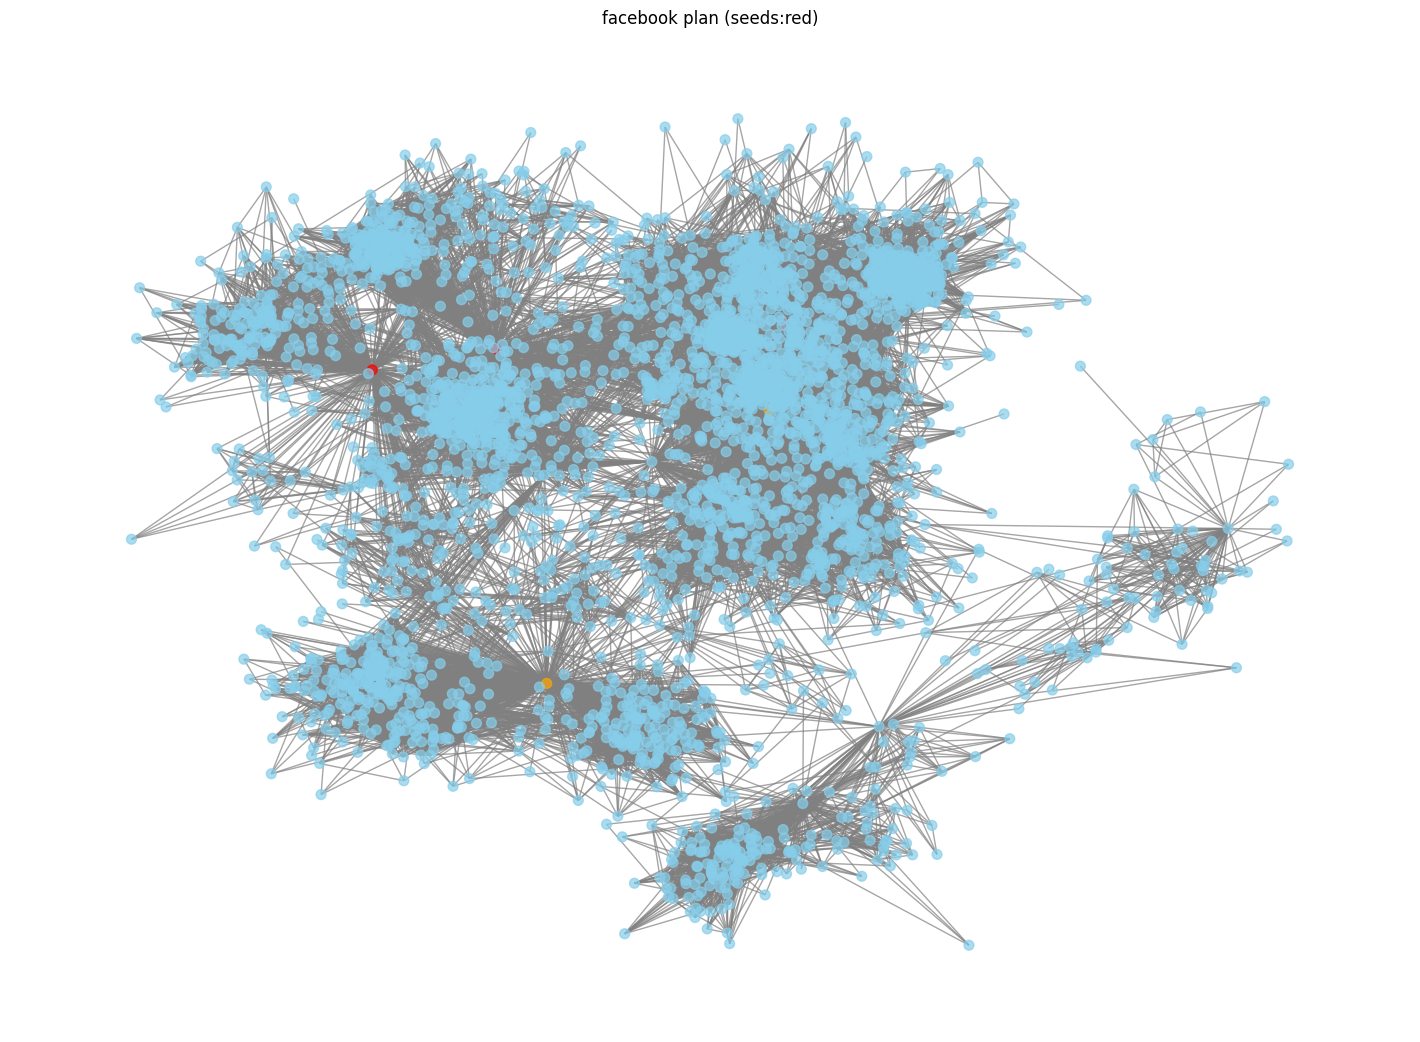

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
import gzip
import shutil
import pandas as pd
from collections import defaultdict

# 1. دانلود و آماده‌سازی دیتاست
def prepare_dataset():
    if not os.path.exists('facebook_combined.txt'):
        print("در حال دانلود دیتاست فیسبوک...")
        url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
        urllib.request.urlretrieve(url, 'facebook_combined.txt.gz')

        print("اکسترکت کردن فایل...")
        with gzip.open('facebook_combined.txt.gz', 'rb') as f_in:
            with open('facebook_combined.txt', 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        os.remove('facebook_combined.txt.gz')
        print("آماده شد!")
    else:
        print("فایل دیتاست از قبل وجود دارد.")

# 2. بارگیری و تحلیل شبکه
def analyze_network():
    G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

    # نمایش اطلاعات پایه
    print("\n=== اطلاعات شبکه فیسبوک ===")
    print(f"تعداد کاربران: {G.number_of_nodes()}")
    print(f"تعداد ارتباطات: {G.number_of_edges()}")
    print(f"میانگین دوستان هر کاربر: {2*G.number_of_edges()/G.number_of_nodes():.1f}\n")

    # 3. تعریف مجموعه "سید" (ترکیب روش خودکار و دستی)
    # روش خودکار: 5 کاربر پرطرفدار
    top_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
    auto_saeed = {node for node, _ in top_degree}

    # روش دستی: انتخاب کاربران مهم (مثلاً کاربران 0، 107، 1684)
    manual_saeed = {0, 107, 1684}  # نمونه کاربران مهم

    # ادغام مجموعه‌ها
    saeed_set = auto_saeed.union(manual_saeed)
    print(f"اعضای مجموعه 'سید': {saeed_set}\n")

    # 4. محاسبه پیج‌رنک
    print("در حال محاسبه PageRank استاندارد...")
    std_pagerank = nx.pagerank(G, alpha=0.85)

    print("در حال محاسبه PageRank شخصی‌سازی شده...")
    personalization = {node: 10 if node in saeed_set else 1 for node in G.nodes()}
    pers_pagerank = nx.pagerank(G, alpha=0.85, personalization=personalization)

    # 5. نمایش نتایج
    def print_results(title, ranks, saeed_set):
        print(f"\n=== {title} ===")
        print("{:<8} {:<15} {:<10} {}".format("کاربر", "PageRank", "دوستان", "سید"))
        print("-"*45)
        for node, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True)[:15]:
            is_saeed = "*" if node in saeed_set else ""
            print("{:<8} {:<15.6f} {:<10} {}".format(node, rank, G.degree[node], is_saeed))

    print_results("نتایج استاندارد", std_pagerank, saeed_set)
    print_results("نتایج شخصی‌سازی شده", pers_pagerank, saeed_set)

    # 6. ذخیره نتایج
    df = pd.DataFrame({
        'User': list(std_pagerank.keys()),
        'Standard_PR': list(std_pagerank.values()),
        'Personalized_PR': list(pers_pagerank.values()),
        'Friends': [G.degree[node] for node in std_pagerank.keys()],
        'Is_Saeed': ['*' if node in saeed_set else '' for node in std_pagerank.keys()]
    })
    df.to_csv('facebook_pagerank_results.csv', index=False)
    print("\nنتایج در فایل 'facebook_pagerank_results.csv' ذخیره شد.")

    # 7. ترسیم گراف (نمونه‌ای از کاربران)
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, seed=42)

    # رنگ‌آمیزی: سیدها قرمز، کاربران برتر نارنجی، بقیه آبی
    node_colors = []
    for node in G.nodes():
        if node in manual_saeed:
            node_colors.append('red')
        elif node in auto_saeed:
            node_colors.append('orange')
        else:
            node_colors.append('skyblue')

    nx.draw(G, pos, node_size=50, node_color=node_colors, edge_color='gray', alpha=0.7)
    plt.title("facebook plan (seeds:red)")
    plt.show()

# اجرای توابع
prepare_dataset()
analyze_network()